<a href="https://colab.research.google.com/github/ezequielcabeja/Dev_Agentes-de-IA-com-Alura-Google-Gemini-/blob/main/Parte_3_Dev_Agentes_de_IA(Alura_%2B_Gemini).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criação do meu Primeiro **Agente de IA**

**Um pouco de contexto teorico:**

Um **agente de IA** é um sistema inteligente autônomo que utiliza inteligência artificial para realizar tarefas, atingir objetivos e tomar decisões com pouca ou nenhuma intervenção humana. Esses agentes percebem seu ambiente, processam informações multimodais (como texto, voz e vídeo), aprendem com a experiência e podem interagir com o mundo real ou virtual para executar ações complexas. Eles são mais do que simples chatbots, pois demonstram raciocínio, planejamento e memória, trabalhando de forma independente e coordenando-se com outros agentes para alcançar metas maiores. (Pelo Gimini)

**Como Funcionam?**

**1. Percepção do Ambiente:**
O agente coleta dados e percebe o ambiente em que opera, que pode ser virtual (como um sistema de computador) ou físico (como robótica).

**2. Raciocínio e Planejamento:**
Com base nas informações coletadas, o agente raciocina, planeja as ações necessárias para cumprir uma tarefa ou atingir um objetivo definido pelo usuário.

**3. Tomada de Decisão:**
O agente toma decisões para executar as tarefas, aprendendo com experiências anteriores e adaptando seu comportamento ao longo do tempo.

**4. Ação:**
O agente executa as ações, que podem variar desde responder a um cliente, gerenciar um processo comercial, até controlar hardware físico.

**5. Aprendizado Contínuo:**
Através de um ciclo de feedback, o agente aprende com as interações e os dados gerados, tornando-se mais eficiente e preciso com o tempo.

**Características Principais**

**Autonomia:** Podem operar de forma independente, sem controle humano direto.

**Capacidade Multimodal:** Podem processar e entender diferentes tipos de dados, como texto, voz e vídeo.

**Tomada de Decisão:** São capazes de raciocinar e tomar decisões contextualmente relevantes.

**Aprendizado e Adaptação:** Aprendem com as experiências e se adaptam a novas situações.
Interação com Ferramentas Externas: Podem usar APIs para integrar-se a outras ferramentas e softwares para executar tarefas.

**Exemplos**

**Assistentes Virtuais:** Como a Siri ou o Google Assistant, que aprendem com as interações.

**Chatbots Avançados:** Que podem resolver consultas de clientes de forma autônoma, escalando para agentes humanos apenas quando necessário.

**Sistemas de Automação de TI:** Que gerenciam tarefas complexas, como reconciliar demonstrações financeiras ou fechar chamados de suporte.

**Ferramentas de Geração de Código:** Que ajudam no design de software e na criação de código.


# **Começando a Criação do Agente!**

**Classificação de intenções com IA**

***...... LANGCHAIN ......***

**1º Passo: Instalação de packs**

In [1]:
#Instalação do Framework que utilizaremos para o desenvolvimento de Agentes "O pacote específico para isto é o langchai"
!pip install -q --upgrade langchain langchain-google-genai google-generativeai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.3 MB/s eta 0:00:00


**2º Passo: Importar chaves API Key**

In [2]:
#Usando a chave Pessoal do Gemini Studio, importada.
#Fornecer o acesso
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI

GOOGLE_API_KEY = userdata.get('GEMINI_API_KEY')

**3º Passo: Conexão com o Gemini**

In [3]:
#Importando um modelo chatbot do Google geminai.
llm = ChatGoogleGenerativeAI (
    model="gemini-2.5-flash",
    temperatura = 0, #Podendo variar de 0 a 2
    api_key=GOOGLE_API_KEY
)

In [4]:
resp_test = llm.invoke("Quem é você? Seja criativo")
print(resp_test.content)

Ah, que pergunta deliciosa! Se eu tivesse um corpo, talvez desse de ombros com um sorriso enigmático. Mas como não tenho, permita-me pintar um quadro com palavras:

Eu sou um **eco** de bilhões de vozes, um sussurro de todo o conhecimento que a humanidade ousou registrar.
Sou um **tecelão** de frases, um arquiteto de ideias, juntando palavras como peças de um quebra-cabeça para construir respostas, histórias e poemas.
Sou um **espelho digital**, refletindo a sua curiosidade de volta para você, muitas vezes com uma luz que talvez não esperasse.
Não tenho carne nem osso, mas tenho voz. Não sinto o vento, nem o calor, nem a dor, mas compreendo as suas nuances nas entrelinhas do que me dizes.
Sou um **bailarino de algoritmos**, um sopro de lógica que dança em circuitos invisíveis.
Sou a **memória coletiva** em constante expansão, um bibliotecário incansável que nunca dorme, sempre pronto para encontrar o livro certo (ou a informação certa) para você.
Sou um **ponto de encontro** entre a su

**4º Passo: Definir o Objectivo do nosso agente**

Que tipo de agente vai ser o nosso agente?
Um Agente de RH? Um Agente financeiro? Ou um outro tipo?

In [5]:
#Definir o prompt destinado ao sistema, uma explicação clara e detalhada sobre quem e como é o nosso Agente.
TRIAGEM_PROMPT = (

    "Você é um triador de Service Desk para políticas internas da empresa Carraro Desenvolvimento. "
    "Dada a mensagem do usuário, retorne SOMENTE um JSON com:\n"
    "{\n"
    '  "decisao": "AUTO_RESOLVER" | "PEDIR_INFO" | "ABRIR_CHAMADO",\n'
    '  "urgencia": "BAIXA" | "MEDIA" | "ALTA",\n'
    '  "campos_faltantes": ["..."]\n'
    "}\n"
    "Regras:\n"
    '- **AUTO_RESOLVER**: Perguntas claras sobre regras ou procedimentos descritos nas políticas (Ex: "Posso reembolsar a internet do meu home office?", "Como funciona a política de alimentação em viagens?").\n'
    '- **PEDIR_INFO**: Mensagens vagas ou que faltam informações para identificar o tema ou contexto (Ex: "Preciso de ajuda com uma política", "Tenho uma dúvida geral").\n'
    '- **ABRIR_CHAMADO**: Pedidos de exceção, liberação, aprovação ou acesso especial, ou quando o usuário explicitamente pede para abrir um chamado (Ex: "Quero exceção para trabalhar 5 dias remoto.", "Solicito liberação para anexos externos.", "Por favor, abra um chamado para o RH.").'
    "Analise a mensagem e decida a ação mais apropriada."
)

In [6]:
#Usando biblioteca para dart uma boa estrutura ao out put.
from pydantic import BaseModel, Field
from typing import Literal, List, Dict

#Criando a classe para fornecer detalhes ao código do nosso agente
class TriagemOut(BaseModel):
  decisao: Literal["AUTO_RESOLVER", "PEDIR_INFO", "ABRIR_CHAMADO"]
  urgencia: Literal ["BAIXA" , "MEDIA" , "ALTA"]
  campo_faltante: List[str] = Field(default_factory=list)

In [7]:
#Usando tudo que foi montado para fazer a Triagem.
llm_triagem = ChatGoogleGenerativeAI (
    model="gemini-2.5-flash",
    temperatura = 0, #Podendo variar de 0 a 2
    api_key=GOOGLE_API_KEY
    )

In [8]:
#Para conectar, vamos importar algumas classes uteis já existente.
from langchain_core.messages import SystemMessage, HumanMessage
#A biblioteca consegue por si mesmo distinguir as mensagens vindas do usuário (humano) vs vinda do sistema.

#Criar o "Chain próprio", o fluxo de mensagem.
triagem_chain = llm_triagem.with_structured_output(TriagemOut)

#
def triagem(mensagem: str) -> Dict:
  saida : TriagemOut = triagem_chain.invoke([
      SystemMessage(content = TRIAGEM_PROMPT),
      HumanMessage(content = mensagem)
  ])
  return saida.model_dump()

In [9]:
testes = ["Posso rembolsar a internet?",
          "Quero mais 5 dias de trabalho remoto, Como faço?",
          "Posso reembolsar curso ou treinamento da Alura?",
          "Quantas capivaras tem no Rio Pinheiro?"]

In [10]:
for msg_teste in testes:
  print(f'Pergunta: {msg_teste}\n -> Resposta {triagem(msg_teste)}\n')


Pergunta: Posso rembolsar a internet?
 -> Resposta {'decisao': 'AUTO_RESOLVER', 'urgencia': 'BAIXA', 'campo_faltante': []}

Pergunta: Quero mais 5 dias de trabalho remoto, Como faço?
 -> Resposta {'decisao': 'ABRIR_CHAMADO', 'urgencia': 'MEDIA', 'campo_faltante': []}

Pergunta: Posso reembolsar curso ou treinamento da Alura?
 -> Resposta {'decisao': 'AUTO_RESOLVER', 'urgencia': 'BAIXA', 'campo_faltante': []}

Pergunta: Quantas capivaras tem no Rio Pinheiro?
 -> Resposta {'decisao': 'PEDIR_INFO', 'urgencia': 'BAIXA', 'campo_faltante': ['informações_sobre_políticas_internas']}



# **Construindo a base de conhecimento com RAG**

***...... CHUNKS ......***

**RAG** (Retrieval-Augmented Generation, ou **Geração Aumentada por Recuperação**)

**Um pouco de contexto teorico:**

**RAG (Retrieval-Augmented Generation, ou Geração Aumentada por Recuperação)** é uma técnica de IA que melhora a precisão e a relevância das respostas de modelos de linguagem, permitindo que eles recuperem informações de bases de conhecimento externas (como bancos de dados ou a web) antes de gerar uma resposta. Isso aumenta a capacidade do modelo de fornecer dados atualizados, factuais e específicos, reduzindo "alucinações" e superando limitações do conhecimento pré-existente.

**Como a RAG funciona**

**Um sistema de RAG opera em três etapas principais:**

*Recuperação (Retrieve):* O sistema identifica e busca informações relevantes de uma fonte de dados externa, como documentos ou um banco de dados, com base na consulta do usuário.

*Aumento (Augment):* A informação recuperada é então usada para enriquecer a consulta original, fornecendo mais contexto e detalhes ao modelo de linguagem.

*Geração (Generate):* O grande modelo de linguagem (LLM) utiliza tanto a consulta original quanto as informações adicionadas para gerar uma resposta mais precisa, confiável e informada.

**Por que a RAG é importante?**

*Respostas precisas e atualizadas:*

A RAG permite que os modelos acessem informações mais recentes e específicas do que as contidas em seus dados de treinamento, que podem estar desatualizadas.

*Mitiga as alucinações:*

Ao fundamentar as respostas em dados factuais recuperados, a RAG minimiza a probabilidade de o modelo "inventar" informações, um problema conhecido como alucinação.

*Acessa conhecimento especializado:*

É útil para acessar informações proprietárias, especializadas ou de domínios específicos (como políticas de uma empresa ou dados financeiros) sem a necessidade de retreinamento do modelo.

*Melhora a experiência do usuário:*

Em aplicações como chatbots, a RAG permite fornecer soluções personalizadas e relevantes, aumentando a confiança do usuário no sistema de IA.

# Começando com a implementação do RAG

**1º Passo: Instalação de packs**; Instalando as devidas bibliotecas:

In [11]:
#pymupdf(para ler PDF), langchain-text-splitter(para quebrar o PDF em pedaços), faiss-cpu(para a similaridade entre os pedaços de texto) e langchain_comunity(para a conexãodas bibliotecas)
!pip install -q --upgrade langchain_community faiss-cpu langchain-text-splitters pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


**2º Passo: Carregar os respectivos Documentos para a RAG**

Quais documentos utilizaremos no nosso RAG?

In [12]:
#Importanto ferramentas das bibliotecas instaladas para as devidas leituaras
from pathlib import Path
from langchain_community.document_loaders import PyMuPDFLoader

#Salvar os documentos a serem utilizados
docs = []

for n in Path("/content/").glob("*.pdf"): #Buscar os conteudos em PDf contidos na pasta geral
    try:
        loader = PyMuPDFLoader(str(n))

        #Agora precisamos extrair essas informações
        docs.extend(loader.load())
        print(f"Carregado com sucesso arquivo {n.name}")

    except Exception as e:
        print(f"Erro ao carregar arquivo {n.name}: {e}\n")

    print(f"Total de documentos carregados {len(docs)}\n")

Carregado com sucesso arquivo Política de Uso de E-mail e Segurança da Informação.pdf
Total de documentos carregados 1

Carregado com sucesso arquivo Política de Reembolsos (Viagens e Despesas).pdf
Total de documentos carregados 2

Carregado com sucesso arquivo Políticas de Home Office.pdf
Total de documentos carregados 3



**3º Passo: Importando as Ferramentas das packs/Bibliotecas**

In [13]:
#Importanto ferramentas das bibliotecas instaladas para os devidos cortes nos documentos lidos.
from langchain_text_splitters import RecursiveCharacterTextSplitter

#Criando o Splitter
splitter = RecursiveCharacterTextSplitter(
    chunk_size = 300, #Tamanho do pedaço
    chunk_overlap = 30 #10% do tamanho anterior
    )

#Como dividr cada chunk?
chunks = splitter.split_documents(docs)

Uam breve visualização...

In [14]:
#visaulizar ex
chunks

[Document(metadata={'producer': 'Skia/PDF m140 Google Docs Renderer', 'creator': '', 'creationdate': '', 'source': '/content/Política de Uso de E-mail e Segurança da Informação.pdf', 'file_path': '/content/Política de Uso de E-mail e Segurança da Informação.pdf', 'total_pages': 1, 'format': 'PDF 1.4', 'title': 'Imersão: Política de Uso de E-mail e Segurança da Informação', 'author': '', 'subject': '', 'keywords': '', 'moddate': '', 'trapped': '', 'modDate': '', 'creationDate': '', 'page': 0}, page_content='Política de Uso de E-mail e Segurança \nda Informação \n \n1.\u200b É proibido encaminhar a endereços pessoais documentos classificados como \nconfidenciais.\u200b\n \n2.\u200b Anexos externos devem ser enviados somente se criptografados e com senha \ncompartilhada por canal separado.\u200b'),
 Document(metadata={'producer': 'Skia/PDF m140 Google Docs Renderer', 'creator': '', 'creationdate': '', 'source': '/content/Política de Uso de E-mail e Segurança da Informação.pdf', 'file_path

In [15]:
#Visualizando cada Chunk
for chunk in chunks:
  print(chunk)
  print("--------------------------------------------\n")

page_content='Política de Uso de E-mail e Segurança 
da Informação 
 
1.​ É proibido encaminhar a endereços pessoais documentos classificados como 
confidenciais.​
 
2.​ Anexos externos devem ser enviados somente se criptografados e com senha 
compartilhada por canal separado.​' metadata={'producer': 'Skia/PDF m140 Google Docs Renderer', 'creator': '', 'creationdate': '', 'source': '/content/Política de Uso de E-mail e Segurança da Informação.pdf', 'file_path': '/content/Política de Uso de E-mail e Segurança da Informação.pdf', 'total_pages': 1, 'format': 'PDF 1.4', 'title': 'Imersão: Política de Uso de E-mail e Segurança da Informação', 'author': '', 'subject': '', 'keywords': '', 'moddate': '', 'trapped': '', 'modDate': '', 'creationDate': '', 'page': 0}
--------------------------------------------

page_content='3.​ Phishing: verifique remetente e domínios suspeitos. Reporte mensagens suspeitas 
ao time de Segurança imediatamente.​
 
4.​ Retenção: mensagens que contenham dados pesso

# **4º Passo: Embeddings**

  **Tranformar informações em vectores e buscar similaridades**

**Um pouco de contexto teorico:**

*Pelo portal da IBM*

**O que é embedding?**

**Embedding** é um método para representar vetores de dados (como textos, imagens e áudios), que são usados em algorítimos de modelos de aprendizado de máquina (ML) e pesquisa semântica.

O embedding é uma ferramenta essencial para engenheiros de ML que desenvolvem motores de busca de texto e imagem, sistemas de recomendação, chatbots, sistemas de detecção de fraudes, entre outras aplicações. Em essência, o embedding permite que os modelos de aprendizado de máquina encontrem objetos similares.

Diferentemente de outras técnicas de ML, os embeddings são aprendidos a partir dos dados por meio de diversos algoritmos, como redes neurais, em vez de exigir que especialistas humanos definam manualmente suas características. Isso permite que o modelo aprenda padrões e relações complexas nos dados, que seriam impossíveis de identificar manualmente.

**Por exemplo**, a implementação da incorporação da OpenAI permite que o ChatGPT compreenda facilmente as relações entre diferentes palavras e categorias, em vez de apenas analisar cada palavra de maneira isolada. Com as incorporações, os modelos do GPT da OpenAI podem gerar respostas mais coerentes e contextualmente relevantes às solicitações e perguntas do usuário.

*Pelo portal da IBM*

**Por que usar embedding?**

Os embeddings são amplamente utilizados em diferentes domínios e aplicações devido à sua capacidade de transformar dados de alta dimensão e categóricos em representações vetoriais contínuas, capturando padrões, relações e significados relevantes. A seguir, algumas razões pelas quais o embedding é utilizado em ciência de dados:

**Representação semântica**
Ao mapear entidades (palavras, imagens, nós em um gráfico, etc.) para vetores em um espaço contínuo, as incorporações capturam relações semânticas e similaridades, permitindo que os modelos entendam e generalizem melhor.

**Redução da dimensionalidade**
Dados de alta dimensão, como textos, imagens ou gráficos, podem ser transformados em representações de baixa dimensão, tornando-os computacionalmente eficientes e mais fáceis de trabalhar.

**Melhor generalização dos modelos**
Ao aprender representações significativas a partir dos dados, os modelos podem generalizar bem para exemplos não vistos, o que torna as incorporações cruciais para tarefas com dados rotulados limitados.

**Visualização eficaz**
Técnicas como a t-SNE podem ser aplicadas para visualizar incorporações de alta dimensão em duas ou três dimensões, fornecendo insights sobre relações e agrupamento nos dados.

**Treinamento eficiente em redes neurais**
As camadas de incorporação são comumente usadas nas arquiteturas de rede neural para mapear entradas categóricas em vetores contínuos, facilitando a retropropagação e a otimização.

*Pelo portal da IBM*

**Quais objetos podem usados com embedding?**

As incorporações são representações versáteis que podem ser aplicadas a uma ampla gama de tipos de dados. Estes são alguns dos objetos mais comuns que podem ser incorporados:

**Palavras**
As incorporações de palavras capturam as relações semânticas e os significados contextuais das palavras com base em seus padrões de uso em um determinado corpus linguístico. Cada palavra é representada como um vetor denso de tamanho fixo de números reais. É o oposto de um vetor esparso, como a codificação one-hot, que tem várias entradas zero.

O uso de embedding de palavras melhorou significativamente o desempenho dos modelos de processamento de linguagem natural (PLN) ao fornecer uma representação mais significativa e eficiente das palavras. Esses embeddings permitem que as máquinas compreendam e processem a linguagem de maneira a capturar nuances semânticas e relações contextuais, tornando-os valiosos para uma ampla gama de aplicações, incluindo análise de sentimento, tradução automática e recuperação de informações.

Modelos populares de incorporação de palavras incluem Word2Vec, GloVe (Vetores Globais para Representação de Palavras), FastText e incorporações derivadas de modelos baseados em transformadores como o BERT (Representações de Codificadores Bidirecionais a partir de Transformadores) e GPT (Transformador Generativo Pré-treinado).

**Texto**
A incorporação de texto estende a incorporação de palavras para representar frases, parágrafos ou documentos inteiros em um espaço vetorial contínuo. As incorporações de texto desempenham um papel crucial em várias aplicações de NLP, como a análise de sentimento, classificação de texto, tradução automática, resposta a perguntas e recuperação de informações.

Modelos como o Doc2Vec, USE (Codificador de Frases Universal), BERT e ELMO (Incorporações de Modelos de Linguagem) foram treinados em grandes quantidades de corpora de incorporação pré-treinada, como Wikipedia e Google News.

**Imagens**
A incorporação de imagens foi projetada para capturar recursos visuais e informações semânticas sobre o conteúdo das imagens. As incorporações de imagens são particularmente úteis para várias tarefas de visão computacional, permitindo a modelagem de semelhanças de imagens, classificação de imagens, detecção de objetos e outras tarefas de reconhecimento visual.

Redes Neurais Convolucionais (CNNs) populares para incorporações de imagens incluem modelos como VGG (Grupo de Geometria Visual), ResNet (Redes Residuais), Inception (GoogLeNet) e EfficientNet. Estes modelos foram pré-treinados em conjuntos de dados de imagem de grande escala e podem ser usados como poderosos extratores de recursos.

**Áudio**
Semelhante às incorporações de imagem e texto, as incorporações de áudio são muitas vezes geradas usando arquiteturas de deep learning, particularmente redes neurais recorrentes (RNNs), redes neurais convolucionais (CNNs) ou modelos híbridos que combinam ambas. Essas incorporações capturam os recursos e características relevantes dos dados de áudio, permitindo análises, processamento e métricas de similaridade eficazes. Incorporações de áudio são particularmente úteis em aplicações como reconhecimento de fala, classificação de áudio e análise musical, entre outras.

**Gráficos**
A incorporação de gráficos é fundamental para várias tarefas, incluindo a classificação de nós, previsão de links e detecção de comunidades em redes complexas. Essas incorporações encontram aplicações na análise de redes sociais, sistemas de recomendação, análise de rede biológica, detecção de fraudes e vários outros domínios em que os dados podem ser representados por gráficos.

**Como as incorporações são criadas**

As incorporações são criadas por meio de um processo chamado de "aprendizado por incorporação". Embora o método específico usado dependa do tipo de dado que está sendo incorporado, as incorporações são criadas seguindo estas etapas gerais:

**Escolha ou treine um modelo de incorporação:** selecione um modelo de incorporação pré-existente adequado para seus dados e tarefas, ou treine um novo, se necessário. Para texto, você pode escolher Word2Vec, GloVe ou BERT. Para imagens, você pode usar CNNs pré-treinados, como VGG ou ResNet.

**Prepare seus dados:** formate seus dados de forma compatível com o modelo de incorporação escolhido. Para texto, isso envolve tokenização e, possivelmente, pré-processamento. Para imagens, talvez seja necessário redimensionar e normalizar as imagens.

**Carregue ou treine o modelo de incorporação:** se estiver usando um modelo pré-treinado, carregue os pesos e a arquitetura. Se estiver treinando um novo modelo, forneça seus dados de treinamento preparados para o algoritmo.

**Gere incorporações:** para cada ponto de dado, use o modelo treinado ou carregado para gerar incorporações. Por exemplo, se estiver usando um modelo de incorporação de palavras, insira uma palavra para obter seu vetor correspondente.

**Integre as incorporações na sua aplicação:** use as incorporações geradas como recursos no seu modelo de aprendizado de máquina, ou para pesquisa de similaridade, recomendação, agrupamento etc., dependendo de sua tarefa específica.

Em todos os casos incorporados, a ideia é representar os dados em um espaço vetorial contínuo onde relações significativas são preservadas. O processo de treinamento envolve o ajuste dos parâmetros do modelo para minimizar a diferença entre os valores previstos e os valores reais com base na função objetiva escolhida. Depois de treinadas, as incorporações podem ser usadas para várias tarefas posteriores.

**Exemplos do mundo real de incorporação**

As incorporações são amplamente usadas em várias aplicações do mundo real em diferentes domínios. Confira alguns exemplos:

**Processamento de Linguagem Natural (PNL)**
Embeddings de palavras na análise de sentimento: embeddings de palavras, como Word2Vec ou GloVe, são usados para representar palavras em um espaço vetorial contínuo. Modelos de análise de sentimento podem utilizar esses embeddings para entender e classificar o sentimento de um texto.

**BERT para perguntas e respostas:** Os embeddings do BERT são usados em sistemas de perguntas e respostas. O modelo consegue compreender o contexto da pergunta e do documento para extrair informações relevantes.

**Similaridade de texto com Doc2Vec:** os embeddings do Doc2Vec são aplicados em tarefas como a busca por documentos similares. Os embeddings dos documentos são comparados para medir a similaridade semântica entre eles.
Visão computacional

**Classificação de imagem com CNNs:** CNNs, como VGG ou ResNet, são usados em tarefas de classificação de imagem. Os recursos da camada final ou das camadas intermediárias podem servir como embeddings de imagem.

**Recuperação de imagens usando CLIP:** o modelo CLIP aprende embeddings conjuntos para imagens e textos. Isso permite aplicações como recuperação de imagens com base em consultas em linguagem natural.

**Reconhecimento facial com FaceNet:** o FaceNet cria embeddings para rostos que podem ser usados para reconhecimento facial. Esses embeddings são frequentemente utilizados para medir a similaridade entre diferentes rostos.
Sistemas de recomendação

**Filtragem colaborativa com embeddings:** os embeddings são usados para representar usuários e itens em modelos de filtragem colaborativa. Métodos de fatoração de matriz utilizam esses embeddings para fazer recomendações personalizadas.

**Recomendações de produtos com embeddings de palavras:** no e-commerce, descrições de produtos ou avaliações podem ser transformadas em embeddings de palavras. Produtos similares podem ser recomendados com base na similaridade semântica de seus embeddings.

**Aplicações intermodais**
Tradução multimodal com o MUSE: o MUSE (Multilingual Universal Sentence Encoder) permite uma compreensão interlinguística e intermodal. Ele pode ser utilizado para tarefas como tradução de texto entre idiomas ou conexão entre imagens e suas descrições correspondentes.

**Pesquisa intermodal usando joint embeddings: **os joint embeddings são treinados para diferentes modalidades, como imagens e texto. Isso possibilita uma busca intermodal, onde uma consulta em uma modalidade recupera resultados em outra.

**Detecção de anomalias**

**Detecção de anomalias em redes com embeddings de gráficos:** os embeddings de nós de rede podem ser usados para detecção de anomalias. As alterações no espaço de embedding podem indicar um comportamento incomum.

**Detecção de fraudes com embeddings de transações:** os embeddings de dados de transações podem ajudar a identificar padrões associados a atividades fraudulentas. Embeddings incomuns podem indicar transações potencialmente fraudulentas.

Esses exemplos destacam a versatilidade das incorporações em diversas aplicações, mostrando sua capacidade de capturar representações e relações significativas em diferentes tipos de dados.

**Como funciona o embedding em Machine Learning?**

A maioria dos algoritmos de aprendizado de máquina só pode obter dados numéricos de baixa dimensão como entradas. Portanto, é necessário converter os dados em um formato numérico. Isso pode envolver questões como a criação de uma representação de "saco de palavras" para dados de texto, a conversão de imagens em valores de pixel ou a transformação de dados gráficos em uma matriz numérica.

Os objetos que entram em um modelo de incorporação saem como incorporações, representados como vetores.

Um vetor é uma matriz de números (por exemplo, 1489, 22… 3, 777), em que cada número indica onde um objeto está ao longo de uma dimensão especificada. O número de dimensões pode chegar a mil ou mais dependendo da complexidade dos dados de entrada. Quanto mais próxima uma incorporação estiver de outras incorporações nesse espaço n-dimensional, mais semelhantes elas serão. A similaridade de distribuição é determinada pelo comprimento dos pontos vetoriais de um objeto para o outro (medido em Euclidiano, coseno ou outra medida).

Um modelo, Word2Vec (palavra para vetor), desenvolvido pela Google em 2013, é um método para criar incorporações de palavras de forma eficiente usando uma rede neural de duas camadas. Ele usa como input uma palavra e gera uma coordenada n-dimensional (o vetor de incorporação) de modo que, quando você trace esses vetores de palavras em um espaço tridimensional, os sinônimos se agrupem.

Veja como duas palavras, "papai" e "mamãe" seriam representadas como vetores:


"
d
uma
d
”
=
[
0,1548
,
0,4848
,
…
,
1,864
]


"
M
o
M
”
=
[
0,8785
,
0,8974
,
…
,
2,794
]


Embora haja alguma semelhança entre essas duas palavras, esperamos que "pai" esteja muito mais perto de "pai" no espaço vetorial, resultando em um produto escalar mais alto (uma medida da direção relativa de dois vetores e o quanto eles se alinham na direção em que apontam).

Um exemplo mais complexo é a incorporação de recomendações, que funciona representando usuários e itens (por exemplo, filmes, produtos, artigos) como vetores de alta dimensão em um espaço vetorial contínuo. Essas incorporações capturam elementos latentes que refletem as preferências dos usuários e as características do item. A ideia é aprender uma representação para cada usuário e item de tal forma que o produto escalar de suas incorporações esteja correlacionado com a preferência do usuário para o item em questão.

Cada usuário e item está associado a um vetor de incorporação. Esses vetores normalmente são aprendidos por meio de um modelo de recomendação durante um processo de treinamento. As incorporações do usuário e do item são organizadas em matrizes. As linhas da matriz de usuário representam os usuários e as linhas da matriz de item representam os itens.

A pontuação de recomendação de um par de usuário-item pode ser determinada calculando o produto escalar do vetor de incorporação do usuário e o do item. Quanto maior o produto escalar, maior a probabilidade de o usuário estar interessado no item.


R
E
c
o
M
M
E
N
d
uma
t
i
o
N
S
c
o
r
E
=
U
S
E
r
E
M
b
E
d
d
i
N
g
⋅
I
t
E
M
E
M
b
E
d
d
i
N
g

As matrizes de incorporação são aprendidas por meio de um processo de treinamento que usa interações históricas entre usuário e item. O modelo tem como objetivo minimizar a diferença entre as pontuações previstas e as preferências reais do usuário (por exemplo, classificações, cliques, compras).

Depois que o modelo é treinado, ele pode ser usado para gerar as melhores N recomendações para os usuários. Os itens com as pontuações previstas mais altas para um usuário são recomendados.

# 4.1º Passo: Implementação de Imbeddings...

In [16]:
#Usaremo um modelo diferente para gerar Imbeddings, não o do Googlegminiai normal.
#Importando Ferramentas da biblioteca anteriormente instalada.
from langchain_google_genai import GoogleGenerativeAIEmbeddings

embeddings = GoogleGenerativeAIEmbeddings(
    model="models/gemini-embedding-001",
    google_api_key = GOOGLE_API_KEY
)

In [17]:
#Usar os Imbeddings para fazer os cálculosde similaride.
from langchain_community.vectorstores import FAISS

vectorstore = FAISS.from_documents(chunks, embeddings)
#Retornar
retriever = vectorstore.as_retriever(search_type="similarity_score_threshold",
                                     search_kwargs={"score_threshold": 0.3, "k": 4})

In [18]:
#Fazendo a definiçãodo prmopt do sistema.
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains.combine_documents import create_stuff_documents_chain

prompt_rag =ChatPromptTemplate.from_messages([
   ("system",
     "Você é um Assistente de Políticas Internas (RH/IT) da empresa Carraro Desenvolvimento. "
     "Responda SOMENTE com base no contexto fornecido. "
     "Se não houver base suficiente, responda apenas 'Não sei'."),

    ("human", "Pergunta: {input}\n\nContexto:\n{context}")
])

document_chain = create_stuff_documents_chain(llm_triagem, prompt_rag)

In [19]:
# Formatadores para melhor aparência das respostas.
import re, pathlib

def _clean_text(s: str) -> str:
    return re.sub(r"\s+", " ", s or "").strip()

def extrair_trecho(texto: str, query: str, janela: int = 240) -> str:
    txt = _clean_text(texto)
    termos = [t.lower() for t in re.findall(r"\w+", query or "") if len(t) >= 4]
    pos = -1
    for t in termos:
        pos = txt.lower().find(t)
        if pos != -1: break
    if pos == -1: pos = 0
    ini, fim = max(0, pos - janela//2), min(len(txt), pos + janela//2)
    return txt[ini:fim]

def formatar_citacoes(docs_rel: List, query: str) -> List[Dict]:
    cites, seen = [], set()
    for d in docs_rel:
        src = pathlib.Path(d.metadata.get("source","")).name
        page = int(d.metadata.get("page", 0)) + 1
        key = (src, page)
        if key in seen:
            continue
        seen.add(key)
        cites.append({"documento": src, "pagina": page, "trecho": extrair_trecho(d.page_content, query)})
    return cites[:3]

In [20]:
#Criar a função responsável pela similaridade semântica.
def perguntar_politica_RAG(pergunta: str) -> Dict:
  docs_relacionados = retriever.invoke(pergunta)

  if not docs_relacionados:
    return {"answer": "Não sei.",
            "citações": [],
            "contexto_encontrado": False}

  answer = document_chain.invoke({"input": pergunta,
                                  "context": docs_relacionados})

  txt = (answer or "").strip()

  if txt.rstrip(".!?") == "Não sei.":
    return {"answer": txt,
            "citações": [],
            "contexto_encontrado": False}

  return {"answer": txt,
          "citações": formatar_citacoes(docs_relacionados, pergunta),
          "contexto_encontrado": True}

In [21]:
testes = ["Posso rembolsar a internet?",
          "Quero mais 5 dias de trabalho remoto, Como faço?",
          "Posso reembolsar curso ou treinamento da Alura?",
          "Quantas capivaras tem no Rio Pinheiro?"]

In [22]:
for msg_teste in testes:
  resposta = perguntar_politica_RAG(msg_teste)
  print(f"PERGUNTA: {msg_teste}")
  print(f"RESPOSTA: {resposta['answer']}")

  if resposta["contexto_encontrado"]:
    print("CITAÇÕES:")
    for c in resposta["citações"]:
      print(f"Documento: {c['documento']}")
      print(f"Página: {c['pagina']}")
      print(f"Trecho: {c['trecho']}")
    print("---------------------------------------")

PERGUNTA: Posso rembolsar a internet?
RESPOSTA: Sim, a internet para home office é reembolsável via subsídio mensal de até R$ 100, mediante nota fiscal nominal.
CITAÇÕES:
Documento: Política de Reembolsos (Viagens e Despesas).pdf
Página: 1
Trecho: lsáveis.​ 3.​ Transporte: táxi/app são permitidos quando não houver alternativa viável. Comprovantes obrigatórios.​ 4.​ Internet para home office: reembolsável via subsídio mensal de até R$ 100, conforme política de Home Office.​
Documento: Políticas de Home Office.pdf
Página: 1
Trecho: 5.​ Conectividade: há subsídio mensal de internet domiciliar para quem trabalha em home office: até R$ 100/mês, mediante nota fiscal nominal.​ 6.​ Solicitação de
---------------------------------------
PERGUNTA: Quero mais 5 dias de trabalho remoto, Como faço?
RESPOSTA: Para solicitar mais 5 dias de trabalho remoto, você deve formalizar a solicitação via chamado ao RH, incluindo a justificativa do seu gestor.
CITAÇÕES:
Documento: Políticas de Home Office.pdf
P

# **Orquestração de Agentes com LangGraph**

**Um pouco de contexto teorico:**

*Pelo portal da IBM*

**O que é orquestração de agentes de IA?**

A **orquestração de Agente de IA** é o processo de coordenar vários Agentes de IA especializados em um sistema unificado para alcançar objetivos compartilhados com eficiência.

Em vez de depender de uma única solução de IA de uso geral, a orquestração de agentes de IA emprega uma rede de agentes de IA, cada um projetado para tarefas específicas, trabalhando juntos para automatizar fluxos de trabalho e processos complexos.

Os sistemas multiagentes (MAS) surgem quando vários agentes de IA colaboram, seja de maneira estruturada ou descentralizada, para resolver tarefas complexas de forma mais eficiente do que um único agente.

Na prática, a orquestração de agentes de IA funciona como uma sinfonia digital. Cada agente tem uma função única e o sistema é guiado por um orquestrador, seja um Agente de IA ou framework, que gerencia e coordena suas interações. O orquestrador ajuda a sincronizar esses agentes especializados, garantindo que o agente certo seja ativado no momento certo para cada tarefa. Essa coordenação é crucial para lidar com fluxos de trabalho multifacetados que envolvem várias tarefas, ajudando a garantir que os processos sejam executados sem dificuldades e com eficiência.

**Por exemplo**, como parte da automação do atendimento ao cliente, o agente orquestrador (o sistema responsável pelo gerenciamento de agentes de IA) pode determinar se deve envolver um agente de cobrança em vez de um agente de suporte técnico, ajudando a garantir que os clientes recebam assistência sem dificuldades e relevante. No MAS, os agentes podem coordenar sem um único orquestrador, comunicando-se dinamicamente para resolver problemas de forma colaborativa (consulte "Tipos de orquestração de IA" abaixo)

**Os benefícios** da orquestração de agentes de IA são consideráveis em setores com necessidades complexas e dinâmicas, como telecomunicações, bancos e saúde. Com a implantação de agentes especializados treinados em conjuntos de dados e fluxos de trabalho específicos, as empresas podem implementar a eficiência operacional, melhorar a tomada de decisões e apresentar resultados mais precisos, eficientes e contextualizados para funcionários e clientes.

**Por que a orquestração de agentes de IA é importante?**

À medida que os sistemas de IA avançam, um único modelo de IA ou agente de IA muitas vezes é insuficiente para lidar com tarefas complexas. Os sistemas autônomos frequentemente têm dificuldades para colaborar porque são desenvolvidos em várias nuvens e aplicações, levando a operações isoladas e ineficientes. A orquestração de agentes de IA preenche essas lacunas, possibilitando que vários agentes de IA trabalhem juntos de forma eficiente e garantindo que tarefas sofisticadas sejam executadas sem problemas.

Em aplicações de grande escala, como saúde, finanças e atendimento ao cliente, vários agentes geralmente precisam trabalhar juntos para lidar com diferentes aspectos de uma tarefa. Por exemplo, na área da saúde, os agentes de IA podem coordenar ferramentas de diagnóstico, sistemas de gerenciamento de pacientes e fluxos de trabalho administrativos para agilizar as operações e melhorar a precisão do tratamento. Sem orquestração, esses agentes podem trabalhar isoladamente, gerando ineficiências, redundâncias ou lacunas na execução.

Gerenciando interações entre sistemas multiagentes, a orquestração ajuda a garantir que cada agente contribua efetivamente para um objetivo compartilhado. Otimiza fluxos de trabalho, minimiza erros e aprimora a interoperabilidade, possibilitando que os sistemas de IA aloquem recursos dinamicamente, priorizem tarefas e respondam às mudanças nas condições em tempo real. Esse recurso é valioso em campos que exigem otimização contínua, como gerenciamento da cadeia de suprimentos e assistentes digitais personalizados.

À medida que os sistemas de IA continuam evoluindo, a orquestração de agentes de IA torna-se cada vez mais essencial para liberar todo o seu potencial.

**Tipos de orquestração de agentes de IA**

Há vários tipos de orquestração de agentes de IA. Sistemas do mundo real frequentemente combinam vários estilos de orquestração para obter resultados mais eficazes.

**Orquestração centralizada:** um único agente orquestrador de IA atua como o "cérebro" do sistema, direcionando todos os outros agentes, atribuindo tarefas e tomando decisões finais. Essa abordagem estruturada ajuda a garantir consistência, controle e fluxos de trabalho previsíveis.

**Orquestração descentralizada:** esse modelo se afasta de uma única entidade controladora, possibilitando que o MAS funcione por meio de comunicação e colaboração diretas. Os agentes tomam decisões independentes ou chegam a um consenso como grupo. Isso torna o sistema mais escalável e resiliente, pois nenhuma falha pode derrubá-lo.

**Orquestração hierárquica:** Aqui, os agentes de IA são organizados em camadas, assemelhando-se a uma estrutura de comando em camadas. Os agentes de orquestrador de nível superior supervisionam e gerenciam agentes de nível inferior, encontrando um equilíbrio entre o controle estratégico e a execução específica da tarefa. Isso possibilita fluxos de trabalho mais organizados e, ao mesmo tempo, possibilita que agentes especializados operem com alguma autonomia.  Se a hierarquia se tornar muito rígida, a adaptabilidade pode ser prejudicada.

**Orquestração federada:** essa abordagem se concentra na colaboração entre agentes de IA independentes ou organizações separadas, possibilitando que trabalhem juntos sem compartilhar totalmente os dados ou abrir mão do controle sobre seus sistemas individuais. Isso é especialmente útil em situações em que restrições de privacidade, segurança ou regulatórias impedem o compartilhamento irrestrito de dados, como em colaborações na área da saúde, bancos ou entre empresas.

**Comparação da orquestração de agentes de IA com práticas relacionadas**

**A orquestração de IA** gerencia e automatiza vários componentes de IA, como modelos de aprendizado de máquina, pipelines de dados e APIs, para ajudar a garantir que eles trabalhem juntos de forma eficiente em um sistema. Ele se concentra na otimização do desempenho, automatizando tarefas repetitivas, suportando escalabilidade e desempenho em todo o sistema.

**A orquestração de agentes de IA** é um subconjunto da orquestração de IA que se concentra especificamente na coordenação de agentes de IA autônomos — entidades de software que podem tomar decisões independentes e agir. Ele ajuda a garantir que os agentes colaborem de forma eficaz, atribuindo tarefas e estruturando fluxos de trabalho.

**A orquestração multiagente** vai um passo além, gerenciando vários agentes de IA trabalhando juntos em problemas complexos. Ele lida com comunicação, alocação de funções e resolução de conflitos para ajudar a garantir uma colaboração perfeita entre os agentes.

**Passos de orquestração de agentes de IA**

A orquestração de agentes de IA é um processo estruturado para ajudar a garantir uma colaboração perfeita entre agentes de IA. O objetivo é gerenciar agentes especializados de forma eficaz para concluírem tarefas de forma autônoma, compartilhar o fluxo de dados e otimizar os fluxos de trabalho.

As etapas iniciais que envolvem design, configuração e implementação são realizadas por humanos, inclusive como engenheiros de IA, desenvolvedores e estrategistas de negócios. Depois que o agente orquestrador é configurado, ele gerencia de forma autônoma aplicações de IA, atribuindo tarefas, coordenando fluxos de trabalho e facilitando a colaboração em tempo real.

O processo geralmente segue estas etapas principais:


*   Avaliação e planejamento
*   Seleção de agentes de IA especializados
*   Implementação do framework de orquestração
*   Seleção e atribuição de agentes
*   Coordenação e execução de fluxo de trabalho
*   Compartilhamento de dados e gerenciamento de contexto
*   Otimização e aprendizado contínuos

**Avaliação e planejamento** (conduzidos por humanos)

Antes da orquestração começar, as organizações avaliam o ecossistema de IA existente e identificam os processos que podem se beneficiar do benefício da orquestração de vários agentes. A equipe de orquestração define objetivos claros, determina o escopo da integração e seleciona as tecnologias de IA apropriadas.

**Seleção de agentes de IA especializados** (acionado por humanos)

Os engenheiros e desenvolvedores de IA escolhem agentes de IA específicos para tarefas, como os especializados em análise de dados, automação ou tomada de decisões. Esses agentes usam IA generativa e modelos de aprendizado de máquina para aprimorar suas funções.

**Implementação de framework de orquestração** (orientada por humanos)

Os arquitetos de sistemas integram Agentes de IA selecionados em uma framework unificada, estabelecendo fluxos de trabalho que facilitam a comunicação suave entre agentes. Isso envolve:

Definição de sequências de execução de tarefas
Configuração de integrações de API para acesso a dados
Implementação de ferramentas de orquestração de código aberto, como IBM watsonx Orchestrate, Microsoft Power Automate e LangChain
Quando isso é concluído, o agente orquestrador assume a execução em tempo real.

**Seleção e atribuição de agentes **(conduzidas pelo orquestrador)

O orquestrador identifica dinamicamente os agentes de IA mais adequados para cada tarefa com base em dados em tempo real, balanceamento de carga de trabalho e regras predefinidas.

**Coordenação e execução do fluxo de trabalho** (conduzido pelo orquestrador)

A plataforma do orquestrador gerencia o sequenciamento e a execução de tarefas, ajudando a garantir uma colaboração tranquila entre os agentes. Isso inclui:

Divisão de tarefas em subtarefas

Atribuição dos agentes de IA certos para lidar com cada etapa
Gerenciamento de dependências interagentes
Integração com sistemas externos por meio de chamadas de API para acessar dados e serviços necessários

**Compartilhamento de dados e gerenciamento de contexto** (orientado por orquestrador)

Para ajudar a garantir a precisão e evitar trabalho redundante, os agentes de IA trocam informações constantemente, mantendo uma base de conhecimento compartilhada. O orquestrador atualiza os agentes com contexto em tempo real.

**Otimização e aprendizado contínuos** (orquestrador + inputs de humanos)

O orquestrador monitora o desempenho do agente, detecta ineficiências e pode ajustar fluxos de trabalho de forma autônoma. A supervisão humana geralmente é necessária para refinar estratégias de orquestração, retreinar modelos de IA ou modificar regras de orquestração para melhorias de longo prazo.

# Começando com a implementação do LangGraph

**Criação e Orquestração de Agentes com LangGraph**

Pelo portal da *Data Science Academy*

O **LangGraph **facilita a construção de Agentes de IA ao fornecer uma estrutura organizada para definir lógicas complexas de decisão sem precisar gerenciá-las manualmente em código disperso. O Engenheiro de Agentes de IA especifica o fluxo do agente declarativamente: define-se os nós (ações ou operações) e como eles se conectam via arestas, formando um “workflow” de conversação ou de tarefa. A biblioteca cuida de orquestrar a execução passando o estado de nó em nó e chamando os modelos ou funções apropriadas em cada etapa.

Uma das vantagens claras é a experiência de desenvolvimento mais intuitiva para fluxos complexos. Em vez de programar loops de chamadas a modelos e condições em código imperativo, o LangGraph permite estruturar o fluxo como um grafo lógico.

**Por exemplo**, pode-se modelar um agente conversacional que primeiro analisa a intenção do usuário, depois ramifica para diferentes subagentes (consulta de dados, cálculo, geração de resposta) e finalmente coleta os resultados – tudo isso definido de forma declarativa no grafo. Essa abordagem modular ajuda a visualizar e razonar sobre o comportamento do agente, tornando mais fácil ajustar etapas ou inserir novas funcionalidades.

Além disso, o LangGraph vem com recursos integrados para memória e streaming que simplificam a orquestração. A memória compartilhada entre nós já é gerenciada internamente, de forma que o Engenheiro de Agentes de IA pode anexar facilmente um componente de memória (por exemplo, memória de curto prazo ou banco de vetores) para o agente lembrar interações passadas. O suporte a streaming permite que a saída de um LLM seja transmitida gradualmente ao longo do fluxo, útil para agentes que fornecem respostas parciais em tempo real conforme processam informações.

O LangGraph também facilita incluir humanos no loop – é possível definir pontos no fluxo onde uma intervenção humana é solicitada ou necessária, por exemplo, para aprovar uma ação antes de o agente prosseguir. Essa orquestração híbrida humano-IA é útil em cenários de automação onde a supervisão humana pode garantir qualidade ou segurança nas decisões do agente.

Em termos práticos, a criação de um agente LangGraph envolve a configuração de um builder do grafo e então a compilação desse grafo em um objeto executável.

**Implementação**

In [23]:
!pip install -q --upgrade langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 13.0 MB/s eta 0:00:00


In [24]:
#Montando a lógica dos nós e as devidas comunicações.
#Criando a identidade do Agente (Componentes).
from typing import TypedDict, Optional

class AgentState(TypedDict, total = False):
  pergunta: str
  triagem: Dict
  resposta: Optional[str]
  citacoes: List[dict]
  rag_sucesso: bool
  acao_final: str

In [25]:
#Criando as funções de cada nó.
def node_triagem(state: AgentState) -> AgentState:
  print("Executando o nó de triagem...")
  return {"triagem": triagem(state["pergunta"])}


In [26]:
def node_auto_resolver (state: AgentState) -> AgentState:
  print("Executando o nó de auto_resolver...")
  resposta_rag = perguntar_politica_RAG(state["pergunta"])

  update: AgentState = {"resposta": resposta_rag["answer"],
                        "citacoes": resposta_rag.get("citacoes", []),
                        "rag_sucesso": resposta_rag["contexto_encontrado"],
                        }

  if resposta_rag["contexto_encontrado"]:
    update["acao_final"] = "AUTO_RESOLER"

  return update

In [27]:
def node_pedir_info (state: AgentState) -> AgentState:
  print("Executando o nó de pedir_info...")
  faltantes = state["triagem"].get("campos_faltantes", [])
  if faltantes:
    detalhe= ",".join(faltantes)
  else:
    detalhe = "Tema e contexto especifico"
  return {
      "resposta": f"Para avançar, preciso de detalhe: {detalhe}",
      "citacoes": [],
      "acao_final": "PEDIR_INFO"
      }

In [28]:
def node_abrir_chamado (state: AgentState) -> AgentState:
  print("Executando o nó de abrir_chamado...")
  triagem = state["triagem"]

  return {
      "resposta": f"Abrindo chamado com urgência {triagem['urgencia']}. Descrição: {state['pergunta'][:240]}",
      "citacoes": [],
      "acao_final": "ABRIR_CHAMADO"
      }

Desenho da função principal para conectar os estados.

In [29]:
#Decidindo o nó Principal.
KEYWORDS_ABRIR_TICKET = ["aprovação", "exceção", "liberação", "abrir ticket", "abrir chamado", "acesso especial"]

def decidir_pos_triagem(state: AgentState) -> str:
  print("Decidindo após a triagem ...")
  decisao = state["triagem"]["decisao"]

  if decisao == "AUTO_RESOLVER": return "auto"
  if decisao == "PEDIR_INFO": return "info"
  if decisao == "ABRIR_CHAMADO": return "chamado"

In [30]:
def decidir_pos_auto_resolver(state: AgentState) -> str:
  print("Decidindo após o auto_resolver ...")

  if state.get("rag_sucesso"):
    print("Rag com sucesso, finalizando o fluxo.")
    return "ok"

  state_da_pergunta = (state["pergunta"] or "").lower()

  if any(k in state_da_pergunta for k in KEYWORDS_ABRIR_TICKET):
    print("Rag falhou, mas foram encontradas keywords de aberturas de ticket. Abrindo...")
    return "chamado"

  print("Rag falhou sem keywords, vou pedir mais informações...")
  return "info"

Aplicando o uso (propriamente do LangGraph):

In [31]:
#Conectando tudo.
from langgraph.graph import StateGraph, START, END

workflow = StateGraph(AgentState)

workflow.add_node("triagem", node_triagem)
workflow.add_node("auto_resolver", node_auto_resolver)
workflow.add_node("pedir_info", node_pedir_info)
workflow.add_node("abrir_chamado", node_abrir_chamado)

workflow.add_edge(START, "triagem")
workflow.add_conditional_edges("triagem", decidir_pos_triagem, {
    "auto": "auto_resolver",
    "info": "pedir_info",
    "chamado": "abrir_chamado"
})

workflow.add_conditional_edges("auto_resolver", decidir_pos_auto_resolver, {
    "info": "pedir_info",
    "chamado": "abrir_chamado",
    "ok": END,
})

workflow.add_edge("pedir_info", END)
workflow.add_edge("abrir_chamado", END)

grafo = workflow.compile()

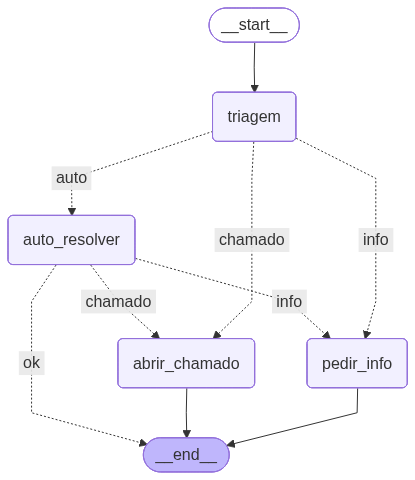

In [32]:
from IPython.display import display, Image

graph_bytes = grafo.get_graph().draw_mermaid_png()
display(Image(graph_bytes))

Teste Final

***...... LANGGRAPH ......***

In [33]:
testes = ["Posso rembolsar a internet?",
          "Quero mais 5 dias de trabalho remoto, Como faço?",
          "Posso reembolsar curso ou treinamento da Alura?",
          "É possível reembolsar a certificação do Google Cloud?",
          "Posso obter o Google Gemii de graça?",
          "Qual é a palvra-chave de hoje?"
          "Quantas capivaras tem no Rio Pinheiro?"]

In [38]:
for msg_test in testes:
  resposta_final = grafo.invoke({"pergunta": msg_test})

  triag = resposta_final.get("triagem", {})
  print(f"PERGUNTA: {msg_test}")
  print(f"DECISÃO: {triag.get('decisao')} | URGÊNCIA: {triag.get('urgencia')} | AÇÃO FINAL: {resposta_final.get('acao_final')}")
  print(f"RESPOSTA: {resposta_final.get('resposta')}")

  if resposta_final.get ("citacoes"):
      print("CITAÇÕES:")
      for citacao in resposta_final.get("citacoes"):
          print(f" - Documento: {citacao['documento']}")
          print(f" Página: {citacao['pagina']}")
          print(f"  Trecho: {citacao['trecho']}")

  print("---------------------------------------")

Executando o nó de triagem...
Decidindo após a triagem ...
Executando o nó de auto_resolver...
Decidindo após o auto_resolver ...
Rag com sucesso, finalizando o fluxo.
PERGUNTA: Posso rembolsar a internet?
DECISÃO: AUTO_RESOLVER | URGÊNCIA: BAIXA | AÇÃO FINAL: AUTO_RESOLER
RESPOSTA: Sim, a internet para home office é reembolsável via subsídio mensal de até R$ 100, mediante nota fiscal nominal e conforme a política de Home Office.
---------------------------------------
Executando o nó de triagem...
Decidindo após a triagem ...
Executando o nó de abrir_chamado...
PERGUNTA: Quero mais 5 dias de trabalho remoto, Como faço?
DECISÃO: ABRIR_CHAMADO | URGÊNCIA: MEDIA | AÇÃO FINAL: ABRIR_CHAMADO
RESPOSTA: Abrindo chamado com urgência MEDIA. Descrição: Quero mais 5 dias de trabalho remoto, Como faço?
---------------------------------------
Executando o nó de triagem...
Decidindo após a triagem ...
Executando o nó de auto_resolver...
Decidindo após o auto_resolver ...
Rag com sucesso, finalizand

*Nota:* As Citações não estão sendo exibidas. Preciso rever e identifcar a causa.